**The goal of this project is to forecast the number of passengers for a given month**

In [ ]:
# importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
# ouvrir la bd
df=pd.read_csv('/content/drive/MyDrive/Artificial Intelligence/Deep Learning/RNN/Passengers/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data=df[['#Passengers']].values # ici on a choisi la collone sur laquelle on va travailler et et on l'a convertit(.values)pour povoir la faire passer au reseau de neurone
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [ ]:
# Preparation de la bd
# Normalisation(0 et 1)
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler(feature_range=(0,1))
data_scaled=sc.fit_transform(data)

In [ ]:
data_scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [ ]:
# separer les donnees en input(donnees du mois precedant) et output(donnees du mois suivant)
X_input=[]
y_output=[]
look_back=1
for i in range (len(data_scaled)-1):
  X_input.append(data_scaled[i:(i+look_back),0])
  y_output.append(data_scaled[i+look_back,0])
X_input,y_output=np.array(X_input),np.array(y_output)
print(X_input)
print(y_output)


[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.19111969]
 [0.24

In [ ]:
X_data=X_input
y_data=y_output

In [ ]:
# Rechaping (Nous rendons notre bd de dimention 3)
X_data=np.reshape(X_input,(X_input.shape[0],X_input.shape[1],1))

In [ ]:
X_data.shape

(143, 1, 1)

In [ ]:
# Split data into Train and Test
train_size=int(len(X_data)*0.7)
test_size=len(X_data)-train_size
X_train=X_data[0:train_size,:]
X_test=X_data[train_size:len(X_data),:]
y_train=y_data[0:train_size]
y_test=y_data[train_size:len(y_data)]

In [ ]:
# Construction du RNN

#1er couche
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))

#2iem couche
model.add(LSTM(units=50, return_sequences=True))

#3iem couche
model.add(LSTM(units=50))

# Ajouter la couche de sortie
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Applique le model
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
4/4 [==============================] - 6s 6ms/step - loss: 0.0710
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0619
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0610
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0483
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0457
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0352
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0346
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0253
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0210
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0163
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0161
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0188
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

In [ ]:
# Faire des previsions
y_pred=model.predict(X_test)

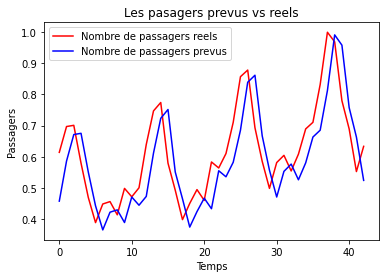

In [ ]:
# Visualiser les resultats
plt.plot(y_test,color='red',label="Nombre de passagers reels")
plt.plot(y_pred,color='blue',label="Nombre de passagers prevus")
plt.title('Les pasagers prevus vs reels')
plt.xlabel('Temps')
plt.ylabel('Passagers')
plt.legend()
plt.show()